In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd



import numpy as np
import matplotlib.pyplot as plt


from glob import glob

import os, sys

sys.path.append('/Users/silas/Documents/switchdrive/')
import helper_scripts as hs

from helper_scripts import DimensionalReduction

import seaborn as sns

import os, sys
sys.path.append('/Users/silas/Documents/GitHub/strainDrep/scripts/')
from common import genome_pdist as gd

In [5]:
working_dir='../WD'

'MAG019' # lactobacillus

## Taxonomy

In [7]:

import pandas as pd
import numpy as np


TAXONMIC_LEVELS=['kindom','phylum','class','order','family','genus','species']

def tax2table(Taxonomy_Series,split_character=';',remove_prefix=False):
    """
        Transforms (green_genes) taxonomy to a table
        Expect the following input format:
        d__Bacteria;p__Bacteroidota;c__Bacteroidia;f__

        Replaces empty values and can remove prefix 'c__'

    """

    if Taxonomy_Series.isnull().any():
        warnings.warn("Some samples have no taxonomy asigned based on checkm. Samples:\n"+ \
                    ', '.join(Taxonomy_Series.index[Taxonomy_Series.isnull()])
                    )
        Taxonomy_Series= Taxonomy_Series.dropna().astype(str)

    Tax= pd.DataFrame(list(  Taxonomy_Series.apply(lambda s: s.split(split_character))),
                       index=Taxonomy_Series.index)


    Tax.columns= TAXONMIC_LEVELS[:len(Tax.columns)]

    if remove_prefix:
        Tax=Tax.applymap(lambda s: s[3:]).replace('',pd.NA)
    else:
        Tax[Tax.applymap(len)==3]=np.nan

    return Tax


DT= pd.read_csv(f'{working_dir}/genomes/taxonomy/gtdbtk.bac120.summary.tsv',sep='\t',index_col=0)

Tax= tax2table(DT.classification, remove_prefix=False)
Labels= Tax.index +' '+Tax.ffill(axis=1).species
Labels.loc[~Tax.species.isnull()]=Tax.species

Tax= tax2table(DT.classification, remove_prefix=True)




## Data

In [8]:
D = pd.read_table(f'{working_dir}/genomes/counts/median_coverage_genomes.tsv',index_col=0)
D.head()

,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG138,MAG139,MAG140,MAG141,MAG142,MAG143,MAG144,MAG145,MAG146,MAG147
shHC1,34.54,10.13,0.0,1.10,9.60,1.45,0.10,5.24,0.00,0.0,...,4.325,6.03,0.11,2.62,3.67,5.84,0.0,4.18,3.16,0.0
shHC2,24.76,8.30,0.0,0.13,1.01,3.84,0.25,0.00,0.23,0.0,...,1.540,9.81,0.00,1.88,0.00,4.68,0.0,3.19,5.43,0.2
shHC3,36.42,9.65,0.0,0.20,4.94,0.20,0.00,0.00,0.00,0.4,...,9.220,7.22,2.12,1.98,1.43,2.48,0.0,2.59,0.78,0.0
shHC4,30.76,22.50,0.0,1.65,4.91,2.15,0.00,0.00,0.00,0.0,...,4.730,14.53,0.20,0.00,0.00,23.56,0.0,9.92,10.44,0.0
shHC5,24.87,7.43,0.2,0.40,4.52,0.40,0.90,0.00,0.00,0.0,...,4.200,3.51,0.22,2.03,1.00,0.56,0.0,3.51,0.39,0.2


In [9]:
data=D.copy()
data = (D.T/D.sum(1)).T

In [10]:
metadata= pd.DataFrame(index=data.index)
metadata['Source']='Feces'
metadata.loc[metadata.index.str.contains('C'),'Source']='Cecum'

metadata['Group']='Hot'
metadata.loc[metadata.index.str.contains('RT'),'Group']='RT'

metadata.to_csv('metadata.tsv',sep='\t')

order=['RT','Hot']

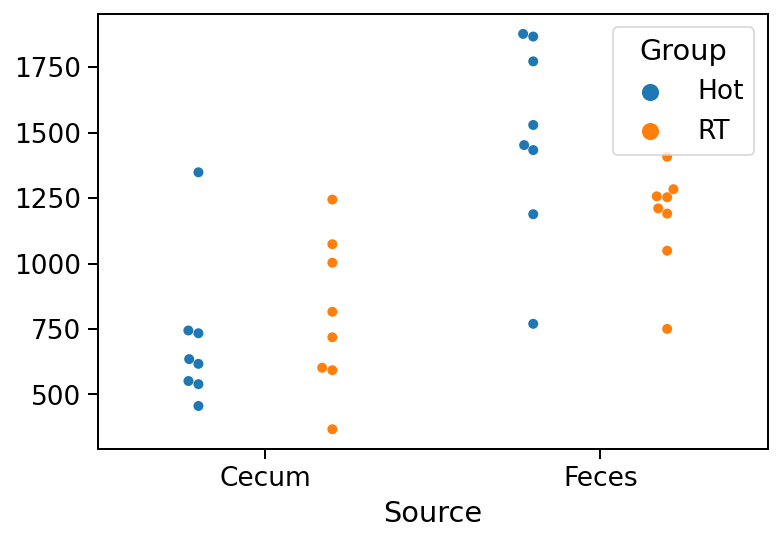

In [11]:
sns.swarmplot(y=D.sum(1),x=metadata.Source,hue=metadata.Group,dodge=True)
plt.show()



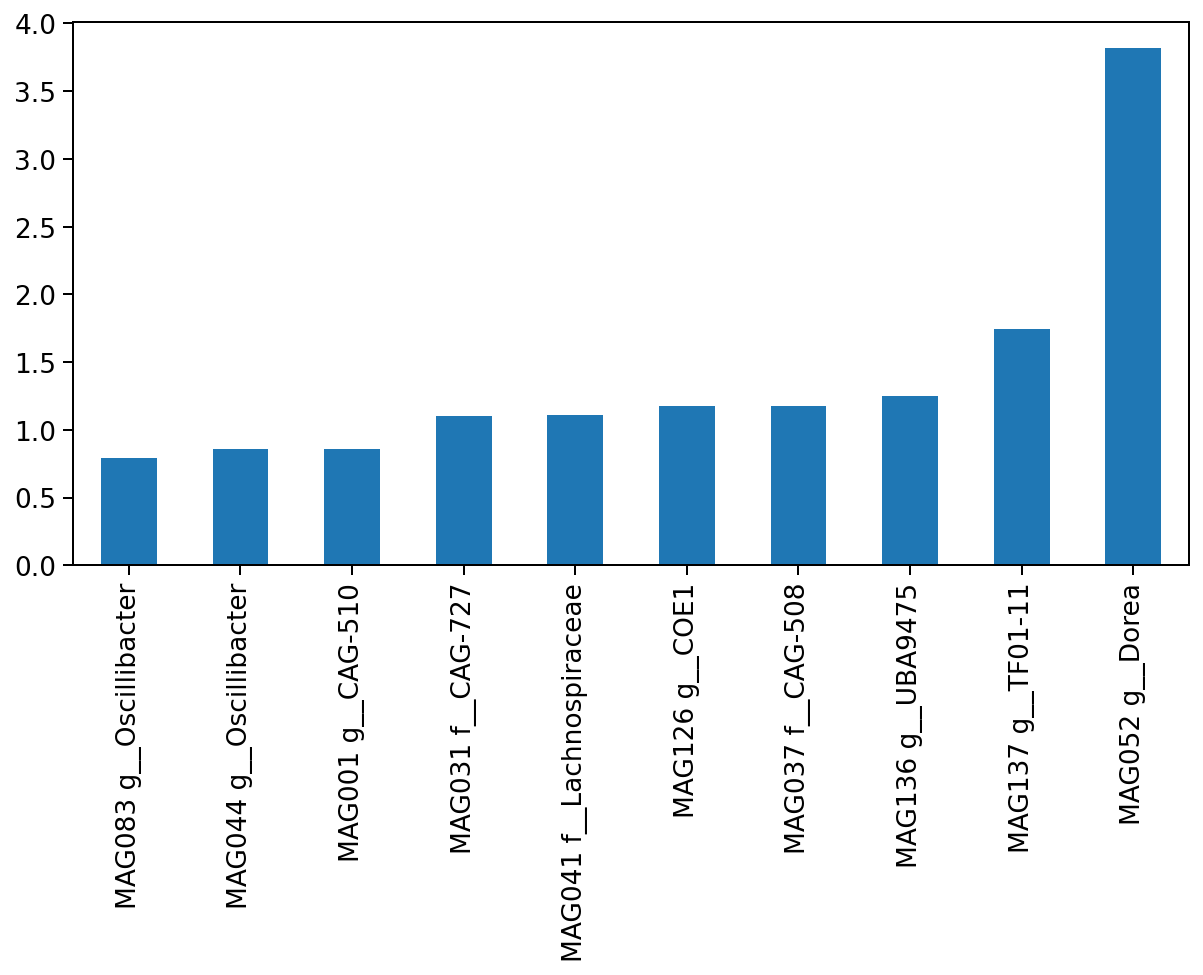

In [12]:
counts_per_genome= data.sum().sort_values()
ax= counts_per_genome[-10:].plot.bar(figsize=(10,5))

_= ax.set_xticklabels(Labels.loc[counts_per_genome.index[-10:]])

/Users/silas/Documents/switchdrive/helper_scripts/Bubbleplots.py:144: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(111)


<AxesSubplot:>

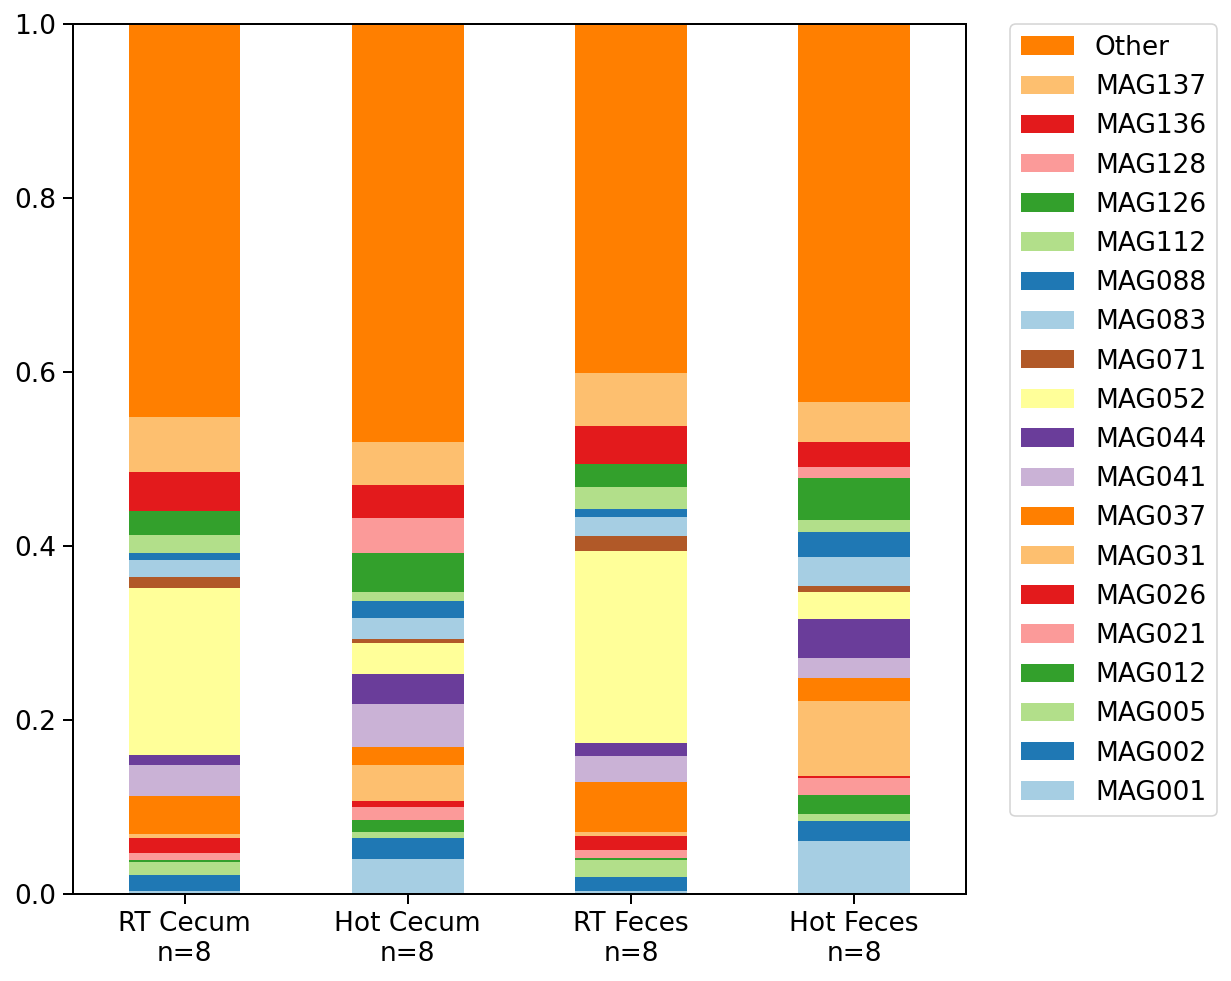

In [13]:

dt =data#.groupby(Tax.family,axis=1).sum()

sns.set_palette('Paired')

hs.bubble.MeanGroup_Barplot(dt,metadata.Group+' '+metadata.Source,
                            order=['RT Cecum','Hot Cecum','RT Feces','Hot Feces'],
                           sp_keywords={'colorM':None})


# Stats based on raw Counts

In [14]:
from importlib import reload
from helper_scripts import MetaTable
from helper_scripts import effect_plot as EP
MetaTable= reload(MetaTable)

<AxesSubplot:xlabel='Sample'>

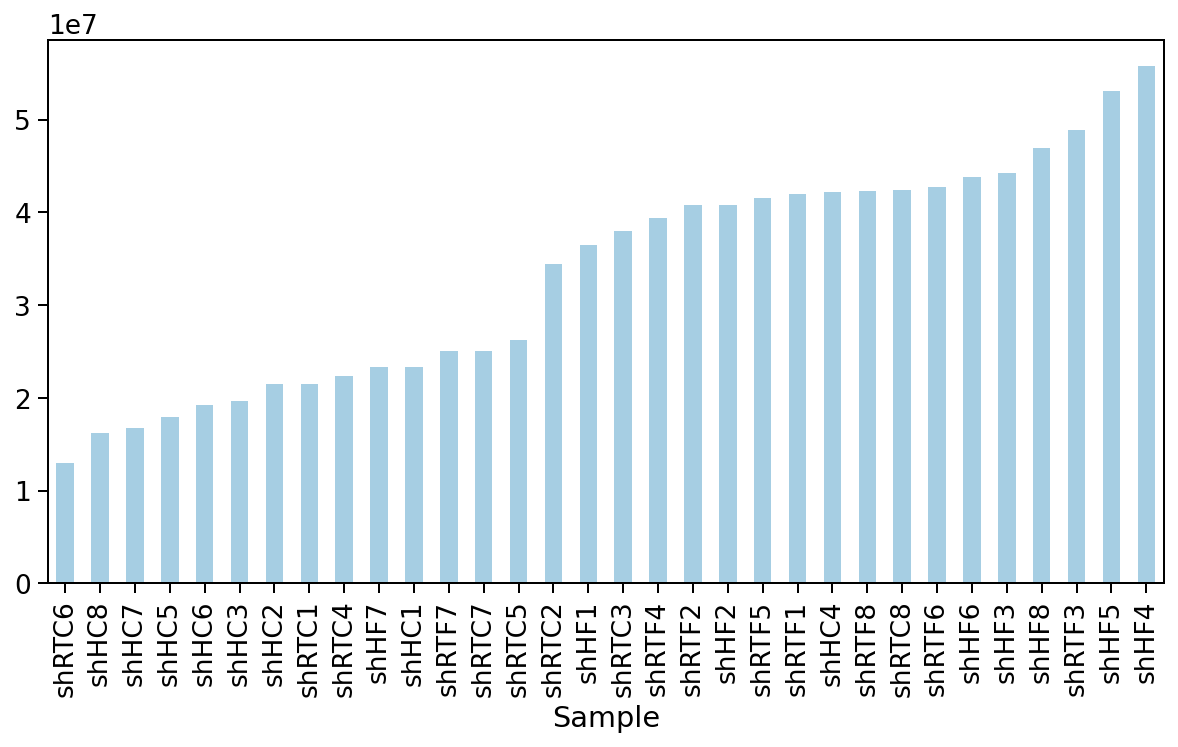

In [15]:
Counts= pd.read_table(f'{working_dir}/genomes/counts/raw_counts_genomes.tsv',index_col=0)
Counts.sum(1).sort_values().plot.bar(figsize=(10,5))




In [16]:
table_params=dict(sample_data=metadata,
             test_variable='Group',
            grouping_variables='Source',
            order_test=order, order_grouping=['Cecum','Feces'],
            colors= ['grey',sns.color_palette('deep')[3]])


In [17]:



data= MetaTable.clr(Counts)

MG= MetaTable.Viewpoint(data,feature_data=Labels, **table_params)
MG.calculate_stats(comparisons=[order])

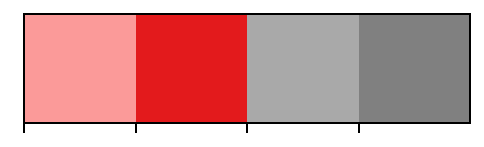

In [18]:
sns.set_palette(sns.color_palette('Paired')[4:6]+['darkgray','gray'])
sns.palplot(sns.color_palette())

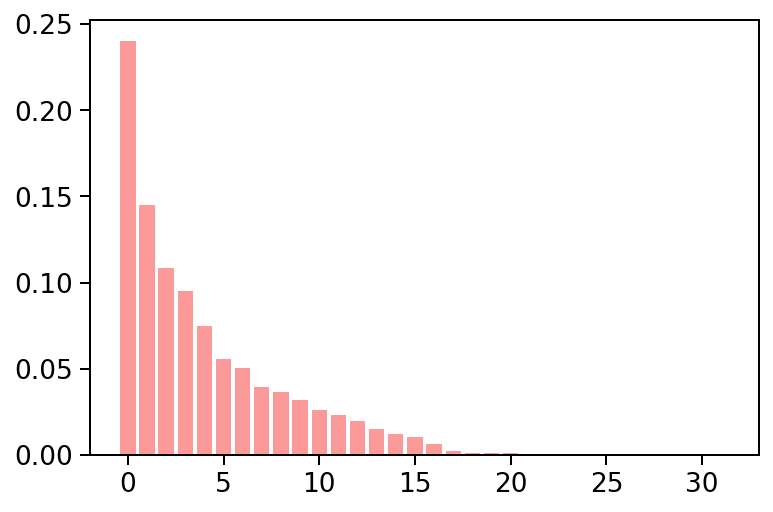

/Users/silas/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1', ylabel='2'>

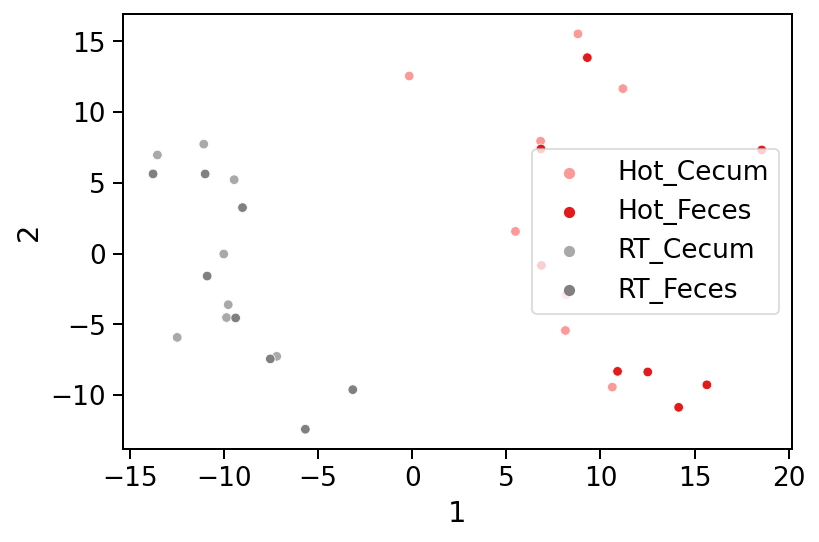

In [19]:
DR= DimensionalReduction.DimensionalReduction(data)

plt.bar(np.arange(DR.decomposition.explained_variance_ratio_.shape[0]),
        DR.decomposition.explained_variance_ratio_)
plt.show()
sns.scatterplot(DR.transformed_data[1],
                DR.transformed_data[2],
                hue=metadata.Group+'_'+metadata.Source)

/Users/silas/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC 1 [24.0 %]', ylabel='PC 2 [14.5 %]'>

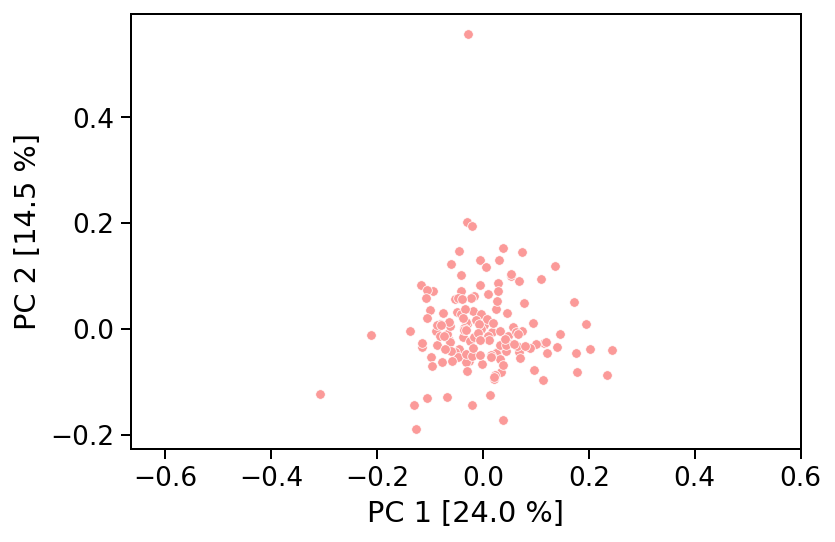

In [20]:
DR.plot_Loadings_2D()

In [21]:
component= DR.components.loc[1]
component.loc[component.abs()>0.2].sort_values(ascending=False)

MAG118    0.243482
MAG006    0.233642
MAG031    0.201430
MAG102   -0.212176
MAG018   -0.307822
Name: 1, dtype: float64

In [22]:
Source='Feces'

In [23]:
Stats = MG.stats.copy()
Stats.columns= Stats.columns.droplevel(-1)

S=Stats['pBH']
FC=Stats['median_diff']
Ab=  MG.data.groupby([MG.grouping_variables,MG.test_variable]).mean().groupby(level=0).max().T

#sig= (S<0.05).any(1) &(FC.abs()>1).all(1) &(Mdiff.prod(1)>0)
sig= (S['Feces']<0.05) &(FC['Feces']>1) #& (Ab['Feces']>0)
sig.sum()

15

In [24]:
sig= FC.loc[sig].sort_values('Feces',ascending=False).index

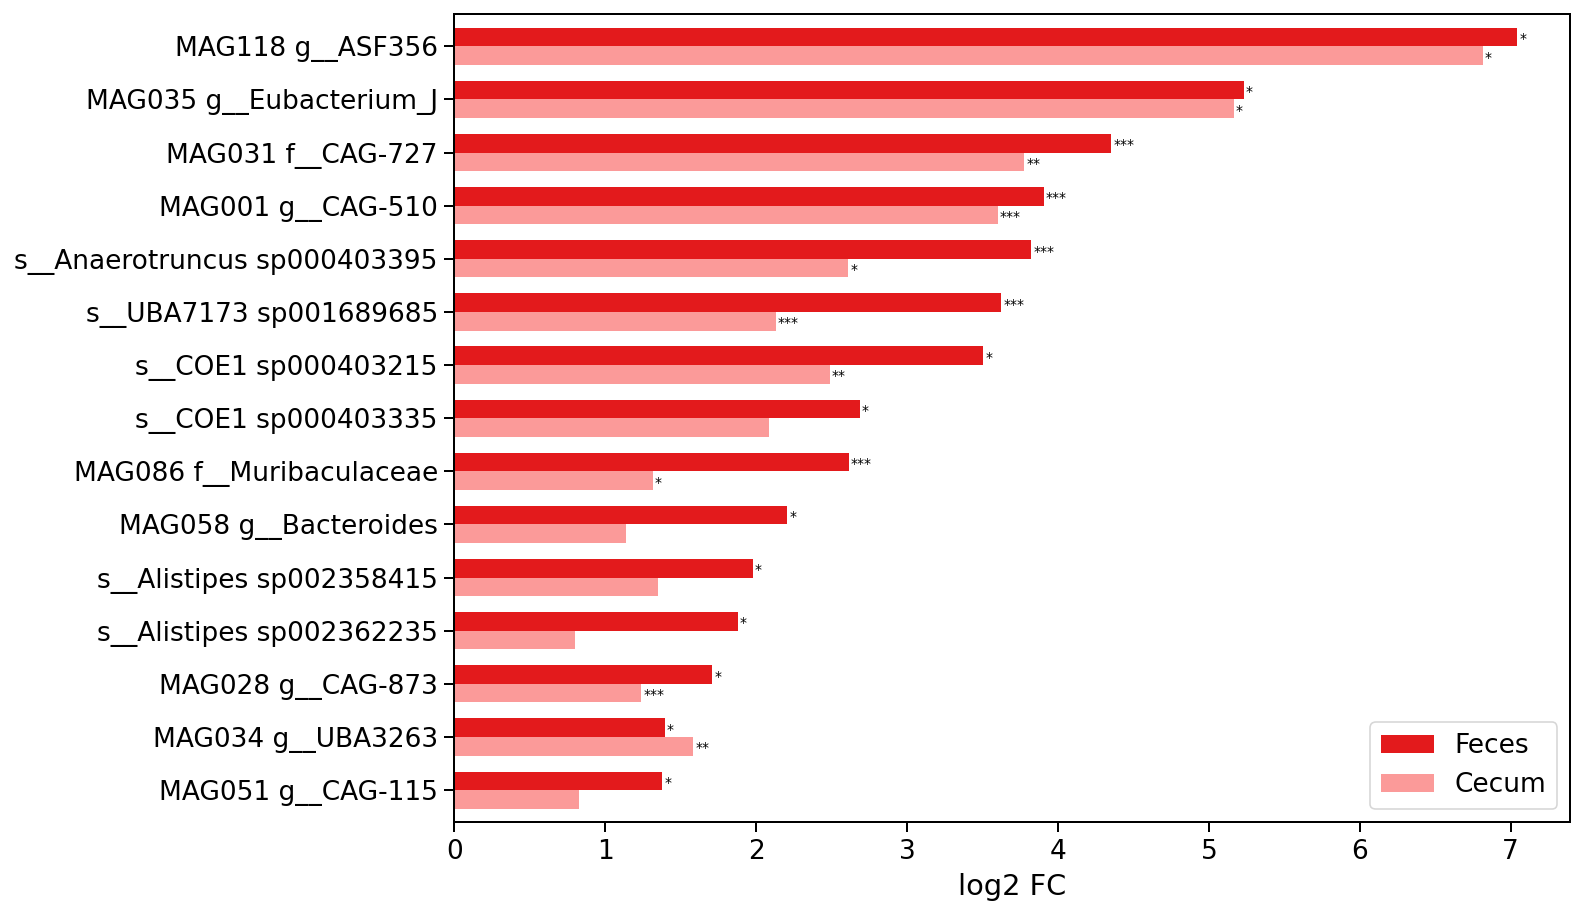

In [25]:
EP.effect_plot(FC.loc[sig],
               Stats.loc[sig,'pBH'],Labels=Labels)
plt.xlabel('log2 FC')

hs.plotting.saveplot('FC_plot','Figures')

# check abundance

In [1]:
genes_of_interest= pd.read_excel('../KEGGgenes/kegg_enzymes.xlsx',index_col=0)

NameError: name 'pd' is not defined

In [2]:
genes_of_interest

NameError: name 'genes_of_interest' is not defined

/Users/silas/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KEGG NAME
K03757    cadaverine:lysine antiporter cadB
K14052             puuP,putrescine importer
Name: ENYZME NAME, dtype: object


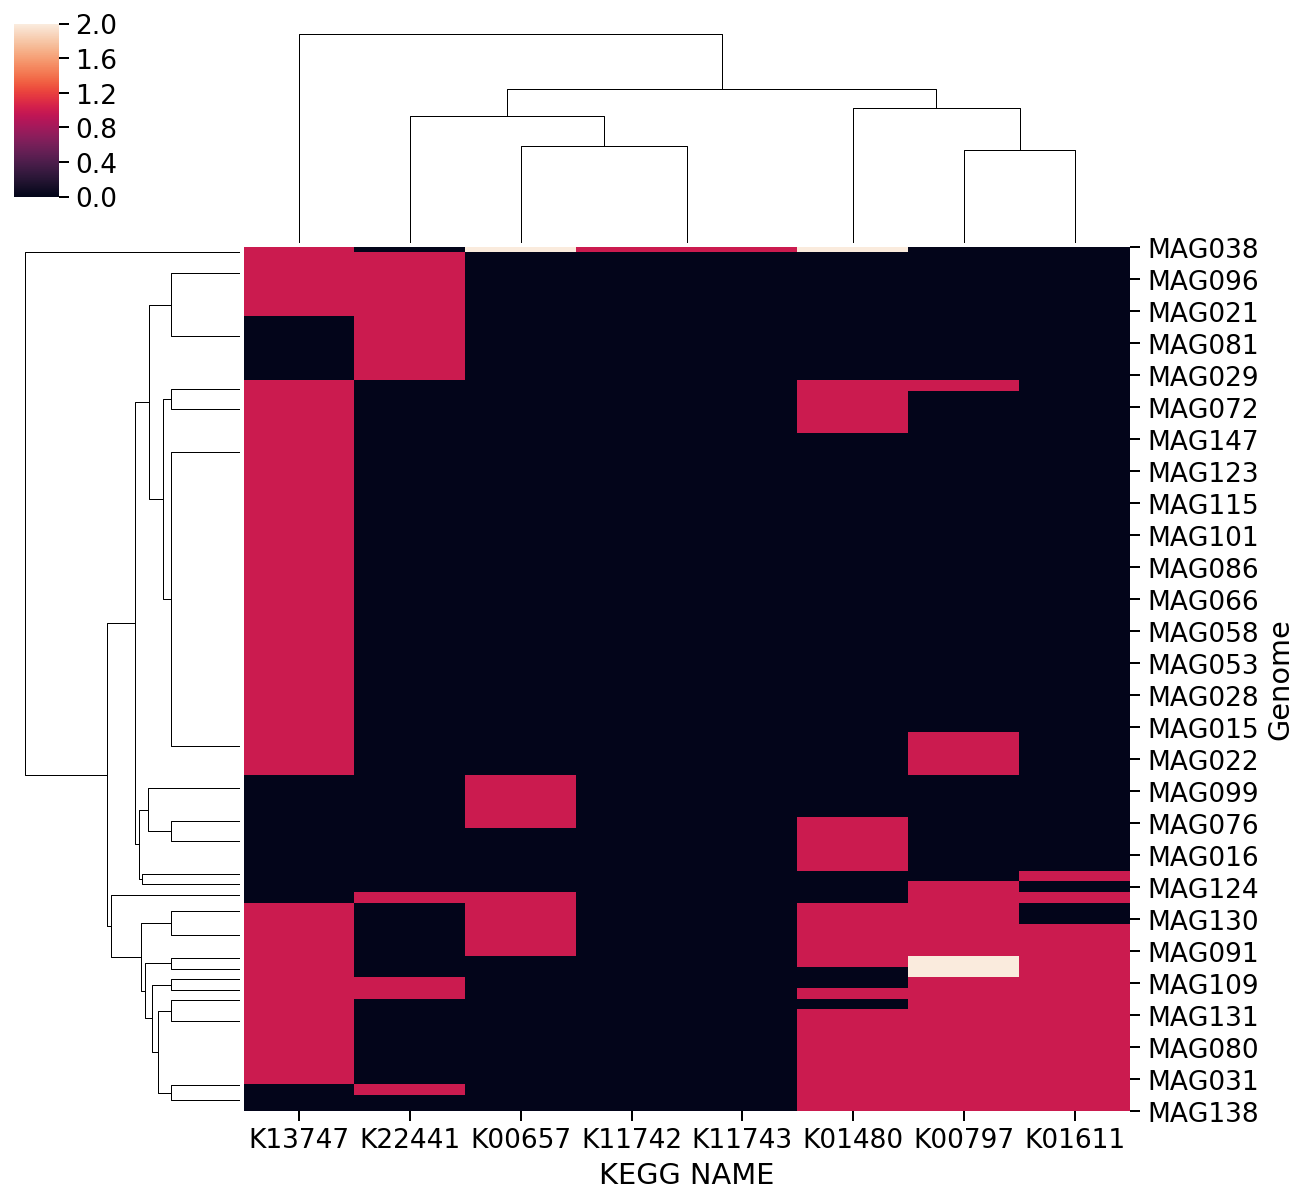

In [90]:
df=K.loc[:,genes_of_interest.index]
print(genes_of_interest.loc[df.isnull().any(),'ENYZME NAME'])

df= df.loc[df.sum(1)>0,df.sum(0)>0]
sns.clustermap(df)


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

genus= Tax.loc[df.index,"genus"].unique()
TaxColors= pd.Series(sns.color_palette("Paired",n_colors=len(genus)),index=sorted(genus))

with PdfPages('../KEGGgenes/results.pdf') as pdf:
    for k in df.columns:
    
    
        
        plot_data= D[df.index[df[k]>0]].groupby(Tax.genus,axis=1).sum().groupby([metadata.Source,metadata.Group]).mean()

        plot_data=plot_data.loc[[('Cecum', 'RT'),('Cecum', 'Hot'),('Feces', 'RT'), ('Feces', 'Hot')]]
        plot_data= plot_data.loc[:,plot_data.max()>0.001]*100
        ax=plot_data.plot.bar(stacked=True,color=TaxColors[plot_data.columns],figsize=(8, 5))
        handles, labels=ax.get_legend_handles_labels()

        ax.legend(reversed(handles),reversed(labels),bbox_to_anchor=(1,1))

        ax.set_ylabel('Relative abundance\nof bacteria [%]')
        ax.set_xticklabels(['RT','Hot']*2,rotation=0)
        ax.set_xlabel('Cecum                     Feces')
        ax.set_title(k+" "+genes_of_interest.loc[k,'ENYZME NAME'])
        
        plt.tight_layout()
    
        pdf.savefig()
        plt.show()

In [133]:
!open ../KEGGgenes/results.pdf

MAG118 MAG118 g__ASF356


Text(0, 0.5, 'Abundance [log2]')

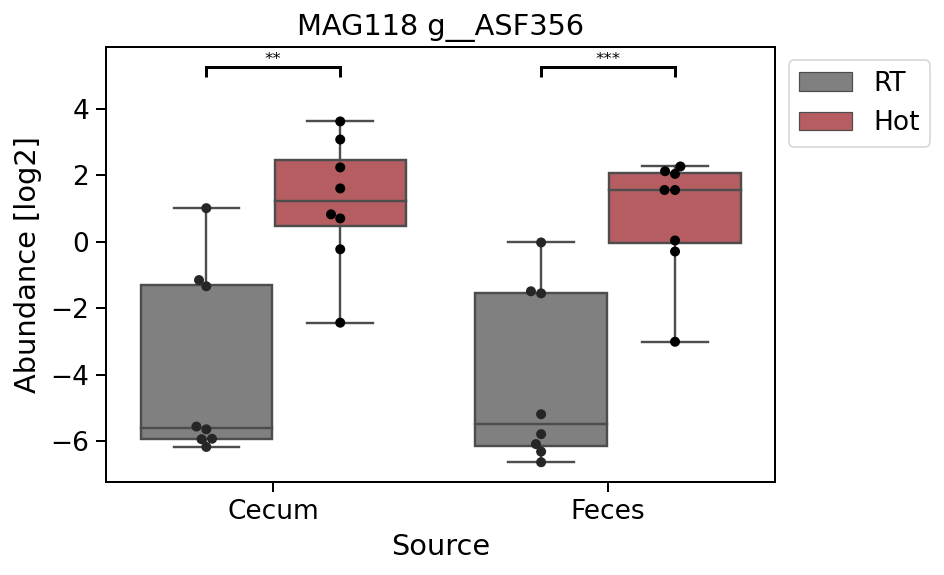

In [34]:
goi = 'MAG118'# Mdiff.loc[sig].sort_values('Cecum',ascending=False).index[1]
print(goi,Labels[goi])



MG.boxplot(goi,distance_between_sig_labels=0)
ax= plt.gca()
ax.set_title(ax.get_ylabel())
ax.set_ylabel('Abundance [log2]')

In [37]:
sig

Index(['MAG118', 'MAG035', 'MAG031', 'MAG001', 'MAG099', 'MAG012', 'MAG082',
       'MAG040', 'MAG086', 'MAG058', 'MAG017', 'MAG088', 'MAG028', 'MAG034',
       'MAG051'],
      dtype='object')

In [28]:
' '.join(sig)

'MAG118 MAG035 MAG031 MAG001 MAG099 MAG012 MAG082 MAG040 MAG058'

In [73]:
Tax.loc[goi]

superkingdom              Bacteria
phylum             Verrucomicrobia
class             Verrucomicrobiae
order           Verrucomicrobiales
family             Akkermansiaceae
genus                 Akkermansia*
species               Akkermansia*
Name: MAG031, dtype: object

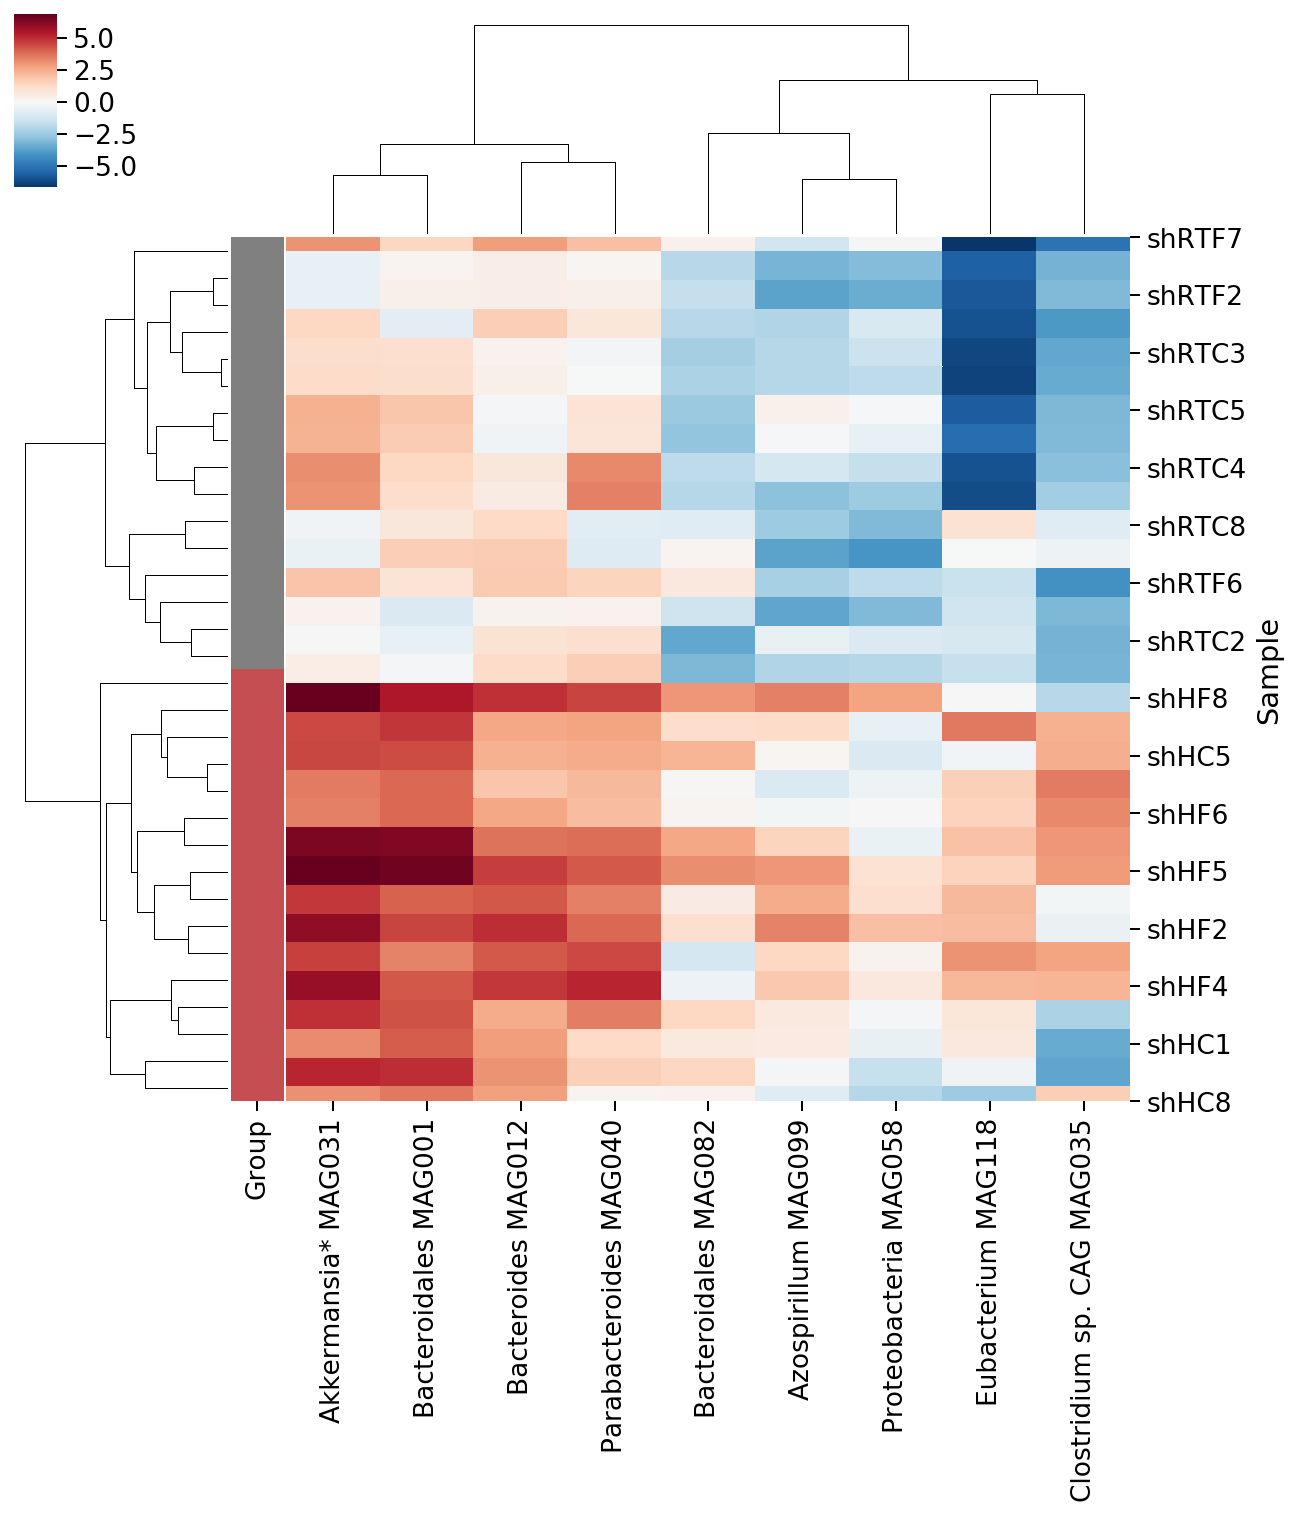

In [75]:
sns.clustermap(MG.data.loc[:, sig],
            row_cluster=True,cmap='RdBu_r', center=0,#z_score=1,
               row_colors= MG.test_variable.map(dict(zip(MG.order_test,MG.colors))),
             xticklabels= Labels.loc[sig]
              )




In [76]:
Source='Feces'

/Users/silas/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/silas/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


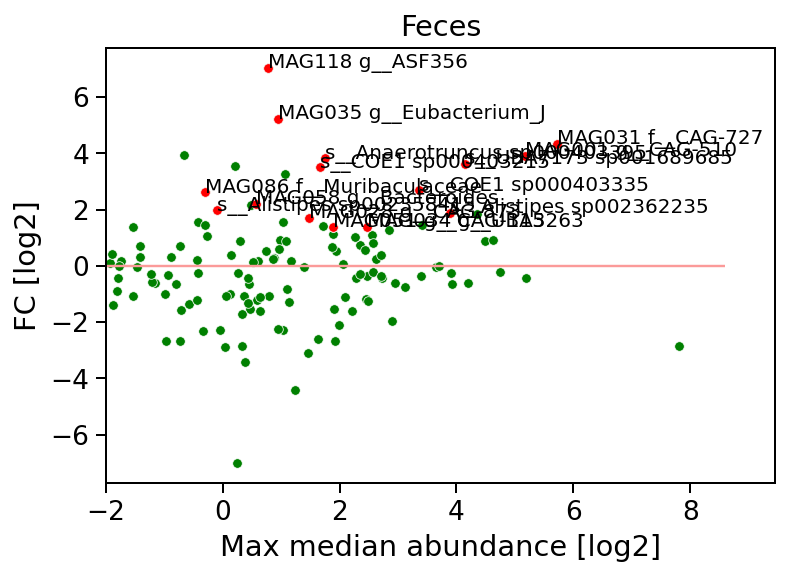

In [32]:

#medians= MG.data.loc[MG.samples['Source']==Source].groupby(MG.samples.Group).mean().T
#Ab=medians.max(1)


from adjustText import adjust_text

def MA_plot(abundance,change,sig=None,ax=None):
    
    if ax is None:
        ax = plt.subplot(111)
        
    abundance= pd.Series(abundance)
    change= pd.Series(change)

    sns.scatterplot(abundance,change,
                    color='g',ax=ax)
    if sig is not None:
        sns.scatterplot(abundance.loc[sig],change.loc[sig],color='r',ax=ax)
    
    ax.set_xlabel('Max median abundance [log2]')
    ax.set_ylabel('FC [log2]')
    ax.hlines(0,*ax.get_xlim())
    
    #ax.fill_between(ax.get_xlim(),-1,1,alpha=0.5,color='grey')

#f, axe = plt.subplots(1,2,figsize=(15,5),sharey=True)
    
MA_plot(Ab[Source],FC[Source],sig)

ax= plt.gca()
ax.set_xlim(left=-2)
ax.set_title(Source)
Score= (Ab[Source]*FC[Source]).loc[Ab[Source]>0]

Names= sig #Score.abs().sort_values(ascending=False).iloc[:9].index
texts = [plt.text(Ab.loc[name,Source],FC.loc[name,Source], Labels.loc[name] ) for name in Names]
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))



In [80]:
sig

Index(['MAG118', 'MAG035', 'MAG031', 'MAG001', 'MAG099', 'MAG012', 'MAG082',
       'MAG040', 'MAG058'],
      dtype='object')

In [79]:
FC.to_csv('../Genome_FC.tsv',sep='\t')

## comparison with culticated Strains